# Semantic Link & Semantic Link Labs


# Semantic Link is installed by default

In [1]:
!pip install -U semantic-link-labs

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 7, Finished, Available, Finished)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.8/810.8 kB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: azure-core
    Found existing installation: azure-core 1.30.2
    Not uninstalling azure-core at /home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages, outside environment /nfs4/pyenv-b8482341-a564-4775-82f8-f61155af40db
    Can't uninstall 'azure-core'. No files were found to uninstall.
  Attempting uninstall: semantic-link-sempy
    Found existing installation: semanti

In [2]:
# Import semantic link and alias
import sempy.fabric as fabric
from sempy.relationships import plot_relationship_metadata

dataset_name = "Hyrule10K"

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 9, Finished, Available, Finished)

### Explore semantic model

In [3]:
df_datasets = fabric.list_datasets()
df_datasets

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 10, Finished, Available, Finished)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,Hyrule10K,81d7eb1e-038e-4873-b854-6bc24c8817ea,2023-05-04 14:36:12,NaT
1,Hyrule10K_RI,fb25aea8-99a1-4f1c-be8c-17d8bf09c46b,2023-05-04 14:36:12,NaT
2,Hyrule10K_WithAutoDate,3dec57cb-01bc-4abc-abad-59eae35a9b50,2023-05-04 14:36:12,NaT
3,Hyrule10K_WithAutoDateXL,708ecebc-4eaf-40ad-8e33-322d4c978ae9,2023-05-04 14:36:12,NaT


### List tables

In [4]:
df_tables = fabric.list_tables(dataset_name)
df_tables

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 11, Finished, Available, Finished)

,Name,Description,Hidden,Data Category,Type
0,Product,,False,,Table
1,Sales,,False,,Table
2,Store,,False,,Table
3,Date,,False,,Table
4,Customer,,False,,Table


## Display columns of a table (along with properties - hidden)

In [5]:
df_columns = fabric.list_tables(dataset_name, include_columns=True)
df_columns[df_columns["Name"] == "Sales"]

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 12, Finished, Available, Finished)

,Name,Description,Hidden,Data Category,Type,Column
1,Sales,,False,,Table,Order Number
1,Sales,,False,,Table,Line Number
1,Sales,,False,,Table,Order Date
1,Sales,,False,,Table,Delivery Date
1,Sales,,False,,Table,CustomerKey
1,Sales,,False,,Table,StoreKey
1,Sales,,False,,Table,ProductKey
1,Sales,,False,,Table,Quantity
1,Sales,,False,,Table,Unit Price
1,Sales,,False,,Table,Net Price


### Visualize Relationships

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 13, Finished, Available, Finished)

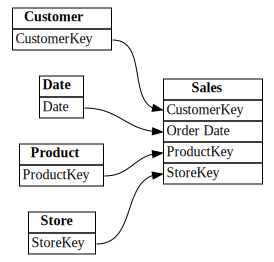

In [6]:
hyruleSemanticModel = "Hyrule10K"
relationships = fabric.list_relationships(hyruleSemanticModel)

plot_relationship_metadata(relationships)

## See the invisible (hidden)

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 14, Finished, Available, Finished)

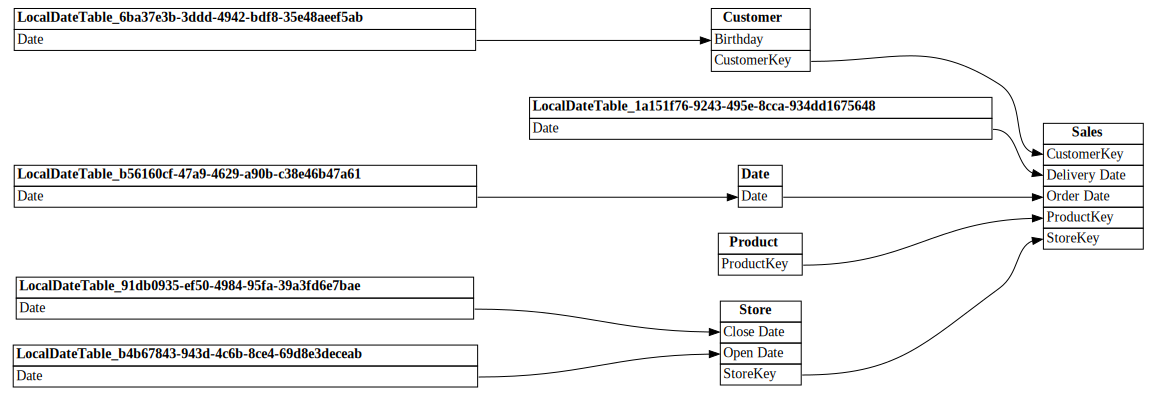

In [7]:
__hyruledate_semanticmodel = "Hyrule10K_WithAutoDate"

relationships_date = fabric.list_relationships(__hyruledate_semanticmodel)
plot_relationship_metadata(relationships_date)

In [8]:
df_measures = fabric.list_measures(dataset_name)
df_measures

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 15, Finished, Available, Finished)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description,Format String,Data Category,Detail Rows Definition,Format String Definition
0,Sales,Sales Amount,"\nSUMX( Sales, \n Sales[Quantity] * Sales[Unit...",Decimal,False,,,"#,0.0",,None,None
1,Sales,#Sales,COUNTROWS(Sales),Int64,False,,,0,,None,None
2,Sales,#LargeSales_Slow,"CALCULATE(COUNTROWS(Sales), FILTER(Sales, Sale...",Int64,False,,,0,,None,None


In [9]:
df_table = fabric.read_table(dataset_name, "Product")
df_table.head(5)

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 16, Finished, Available, Finished)

,ProductKey,Product Code,Product Name,Manufacturer,Brand,Color,Weight Unit Measure,Weight,Unit Cost,Unit Price,Subcategory Code,Subcategory,Category Code,Category
0,1707,0702001,MGS Dal of Honor Airborne M150,Tailspin Toys,Tailspin Toys,Silver,<NA>,<NA>,32.25,70.13,0702,Download Games,07,Games and Toys
1,1708,0702002,MGS Collector's M160,Tailspin Toys,Tailspin Toys,Black,<NA>,<NA>,32.25,70.13,0702,Download Games,07,Games and Toys
2,1709,0702003,MGS Gears of War M170,Tailspin Toys,Tailspin Toys,Blue,<NA>,<NA>,32.25,70.13,0702,Download Games,07,Games and Toys
3,1710,0702004,MGS Age of Empires III: The Asian Dynasties M180,Tailspin Toys,Tailspin Toys,Silver,<NA>,<NA>,32.25,70.13,0702,Download Games,07,Games and Toys
4,1711,0702005,MGS Age of Empires III: The Asian Dynasties M190,Tailspin Toys,Tailspin Toys,Black,<NA>,<NA>,32.25,70.13,0702,Download Games,07,Games and Toys


## Set Spark settings to return tables

In [10]:
spark.conf.set("spark.sql.catalog.pbi", "com.microsoft.azure.synapse.ml.powerbi.PowerBICatalog")

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 17, Finished, Available, Finished)

In [11]:
df = spark.sql("SHOW TABLES FROM pbi")
display(df)

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 18, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, b36678e0-5921-4a12-afcd-99e776f077cb)

## Use Semantic Link to Evaluate Measure

In [12]:
fabric.evaluate_measure(dataset_name, measure="Sales Amount")

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 19, Finished, Available, Finished)

,Sales Amount
0,13131568.507


### GroupBy Columns

In [13]:
fabric.evaluate_measure(dataset_name, measure="Sales Amount", groupby_columns=["Product[Brand]", "Product[Category]"])

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 20, Finished, Available, Finished)

,Brand,Category,Sales Amount
0,A. Datum,Cameras and camcorders,157162.57
1,Adventure Works,Computers,1757321.125
2,Adventure Works,Home Appliances,76160.114
3,Adventure Works,TV and Video,1104993.986
4,Contoso,Audio,51316.412
5,Contoso,Cameras and camcorders,120485.093
6,Contoso,Cell phones,280068.624
7,Contoso,Computers,351031.1
8,Contoso,Home Appliances,1045259.625
9,Contoso,"Music, Movies and Audio Books",442996.744


In [14]:
# Load %%dax cell magic
%load_ext sempy

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 21, Finished, Available, Finished)

In [15]:
%%dax "Hyrule10K"

EVALUATE
SUMMARIZECOLUMNS(
"Sales Amount",[Sales Amount]
)


StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 22, Finished, Available, Finished)

,[Sales Amount]
0,13131568.507


In [16]:
### Run DAX code against Semantic Modal

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 23, Finished, Available, Finished)

In [17]:
__dataset = "Hyrule10K"
__workspace = "The Forge"

__dax = """
EVALUATE 
SUMMARIZECOLUMNS(
    'Product'[Brand],
   'Date'[Month Short],
   'Date'[Year],
   "Sales Amount",
    CALCULATE([Sales Amount])
    )
"""

fabric.evaluate_dax(
    dataset=__dataset,
    dax_string= __dax,
    workspace=__workspace,
    verbose=0,
    num_rows=10
)

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 24, Finished, Available, Finished)

,Product[Brand],Date[Month Short],Date[Year],[Sales Amount]
0,Contoso,Jan,2018,112550.619
1,Wide World Importers,Jan,2018,138872.331
2,Northwind Traders,Jan,2018,7972.614
3,Adventure Works,Jan,2018,155530.706
4,Southridge Video,Jan,2018,33836.24
5,Litware,Jan,2018,40292.423
6,Fabrikam,Jan,2018,31836.546
7,Proseware,Jan,2018,35294.31
8,A. Datum,Jan,2018,6618.92
9,The Phone Company,Jan,2018,104848.8


### Evaluate DAX - Referential Integrity
### This will cause a blank row in the Date table to be generated

In [18]:
__dataset = "Hyrule10K_RI"
__workspace = "The Forge"

dax = """
EVALUATE 
    EXCEPT (
        VALUES( 'Sales'[Order Date] ),
        VALUES('Date'[Date] )
    )
"""

fabric.evaluate_dax(
    dataset=__dataset,
    dax_string= dax,
    workspace=__workspace,
    verbose=0,
    num_rows=None
)

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 25, Finished, Available, Finished)

,Sales[Order Date]
0,2017-12-29
1,2017-12-30
2,2017-12-31
3,2017-12-26
4,2017-12-27
...,...
193,2017-05-27
194,2017-05-29
195,2017-05-30
196,2017-05-31


### **Upon Investigating I would learn I am missing 2017 in my** 
### **date table or it was filtered it out in my Power Query**

### Memory Analyzer
### **One of the items in the Model Health Section**

In [19]:
import sempy.fabric as fabric

__smallmodel = "Hyrule10K"
__workspace = "The Forge"

fabric.model_memory_analyzer(dataset = __smallmodel, workspace = __workspace)

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 26, Finished, Available, Finished)

## **<u>What is different about this one</u>**

In [20]:
import sempy.fabric as fabric

__xlmodel = "Hyrule10K_WithAutoDateXL"
__workspace = "The Forge"

fabric.model_memory_analyzer(dataset = __xlmodel, workspace = __workspace)

StatementMeta(, 6c65096c-b534-4049-b6df-e2227257c7e3, 27, Finished, Available, Finished)